# Tutorial to compute Feldman-Cousins intervals
## Copyright Pietro Vischia, 2020, pietro.vischia@cern.ch

Companion code for Statistics book to be published 2021

The Feldman-Cousins procedure is actually the Neyman procedure, complemented with an ordering principle based on the likelihood ratio.

For a generic model, the likelihood ratio test statistic can be written as:

q(\theta) = -2ln( L(data|\theta, \hat{\alpha}_\theta)/L(data|\hat{\theta}, \hat{\alpha}))
          = -2 ln(L(data|\theta, \hat{\alpha}_\theta) -2 ln(data|\hat{\theta}, \hat{\alpha})

where \theta is the parameter of interest, and \alpha is the (vector of) nuisance parameter that is profiled (i.e. fixed to its maximum likelihood estimate conditional to the value of the POI, in the numerator). The denominator contains the joint global MLEs for both \theta and \alpha.

The Feldman-Cousins procedure consists, given a critical value \alpha, in doing the following for each value of the POI \theta:

    - compute the observed test statistic q_{obs}(\theta)
    - compute the expected distribution of q(\theta) conditional to \theta being the true value of the parameter (i.e. under the hypothesis of \theta being the true value)
    - accept the point in the region if p_{\theta} = P[ q(\theta)>q_{obs}(\theta)|\theta]>\alpha
    
We shall try it out now.

In [1]:
import math
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#First we need a likelihood function, or even better the log-likelihood

# Let's assume we have a sample of N i.i.d. normal random variables with unit variance inserted in a vector x, then the likelihood is:
def lnL(x, theta):
    # Gaussian likelihood
    N=len(x)
    return -N/2.*math.log(2*math.pi)-1/2.*sum((x-[theta for i in range(len(x))])**2)

# Since we are at it, let's also write down the MLE, that in case of a gaussian likelhood we know analytically it is the mean
# We have to slightly modify it, though, to account for the physical boundary (we assume that for a measurement x, the physically-allowed value of the MLE for theta is therefore max(0,x)

def mle(x):
    return max([sum(x)/len(x), 0.])

theta space shape: (20,) dataspace: (10,)


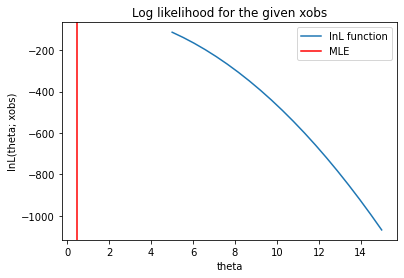

In [3]:
# As a test, now let's plot the log likelihood for a specific data realization
#xobs=np.random.normal(loc=10, scale=1.0, size=10)
xobs=np.random.normal(loc=0.5, scale=1.0, size=10)

# Let's scan a parameter range in theta from 5 to 15
thetaspace=np.linspace(5., 15., num=20)
print('theta space shape:', thetaspace.shape, 'dataspace:', xobs.shape)

mylnL=[ lnL(xobs,theta) for theta in thetaspace ]

plt.plot(thetaspace, mylnL, label='lnL function')
plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Log likelihood for the given xobs')
plt.xlabel('theta')
plt.ylabel('lnL(theta; xobs)')
plt.legend(loc='best')

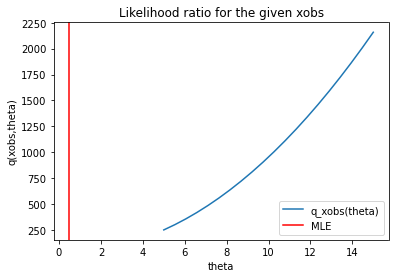

In [4]:
# Now we need the likelihood ratio.
# Let's first assume we don't have any nuisance parameter.

def q(x, theta):
    return -2*lnL(x, theta) -2*lnL(x,mle(x)) 

# Let's plot the likelihood ratio

myq=[ q(xobs,theta) for theta in thetaspace ]

plt.plot(thetaspace, myq, label='q_xobs(theta)')
plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Likelihood ratio for the given xobs')
plt.xlabel('theta')
plt.ylabel('q(xobs,theta)')
plt.legend(loc='best')

In [5]:
# Let's generate the distribution of the test statistic for a generic measurement of the mean

def qdist(theta, anal):
    measurements=np.linspace(-5.,15., num=2000)
    return [ q(np.random.normal(loc=mu, scale=1.0, size=10), theta) for mu in measurements] 

# Given this function, we also need a function to compute its integral

def px(qdist,qobs):
    # VERY crude integral
    return(float(sum([ x for x in qdist if x >=qobs]) / sum(qdist)))


In [6]:
# Choose the critical value
alpha=0.68

xIntervals=[]
mymeasurements=np.linspace(-5.,15., num=50)

for theta in thetaspace:
    xInterval=[]
    for mu in mymeasurements:
        xobsi=np.random.normal(loc=mu, scale=1.0, size=10)
        qobs=q(xobsi,theta)
        qcond=qdist(theta,True)
        if px(qcond,qobs) > alpha:
            xInterval.append(theta)
    xIntervals.append(xInterval)

print(xIntervals)

[(-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (-5.0, 15.0), (5.0, 5.526315789473684), (5.0, 6.578947368421053), (5.0, 6.052631578947368), (5.0, 6.578947368421053), (5.0, 7.105263157894736), (5.0, 7.105263157894736), (5.0, 7.631578947368421), (5.0, 8.157894736842106), (5.0, 8.157894736842106), (5.0, 8.157894736842106), (5.0, 8.68421052631579), (5.0, 9.736842105263158), (5.0, 9.736842105263158), (5.0, 10.263157894736842), (5.0, 10.789473684210526), (6.052631578947368, 15.0), (5.526315789473684, 11.31578947368421), (6.578947368421053, 15.0), (6.052631578947368, 15.0), (7.105263157894736, 15.0), (8.157894736842106, 15.0), (8.157894736842106, 15.0), (8.157894736842106, 15.0), (8.157894736842106, 15.0), (9.210526315789473, 15.0), (9.736842105263158, 15.0), (9.210526315789473, 15.0), (10.789473684210526

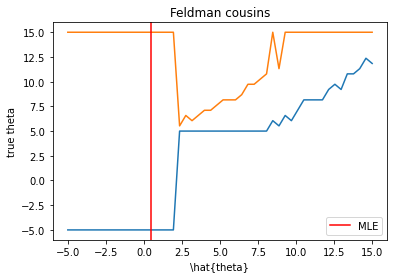

In [7]:
# Plot this

lower=[]
upper=[]
for i in xIntervals:
    lower.append(min(i))
    upper.append(max(i))
    
plt.plot(mymeasurements,lower)
plt.plot(mymeasurements,upper)
plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Feldman cousins')
plt.xlabel('\hat{theta}')
plt.ylabel('true theta')
plt.legend(loc='best')

In [2]:
# Reproduce Figure 10 of the Feldman-Cousins paper https://arxiv.org/abs/physics/9711021
# to illustrate what happens with a physical boundary.
# We assume the gaussian has a positive-definite mean

# For a measurement x, the physically-allowed value of the MLE for theta is therefore max(0,x)

# The likelihood ratio uses this thetabest in the denominator

In [3]:
# 1D Likelihood

def lnL(x, theta):
    return math.log(2*math.pi)-1/2.*(x-theta)**2


def mle(x):
    return max(x, 0.)

# here we already did the computation of the likelihood ratio (eq. 4.3 of the paper)
def q(x, theta):
    # The trick: 
    return math.exp(-(x-theta)**2/2.) if x>=0 else math.exp(x*theta -theta**2/2)

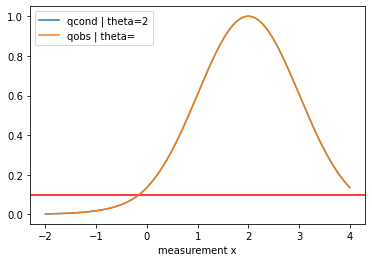

In [22]:

def qdist(theta,measurements=None):
    if measurements is None:
        measurements=np.linspace(-2.,4., num=2000)
    return [ q(x, theta) for x in measurements] 

# Given this function, we also need a function to compute its integral

def px(qdist,qobs,xspace=None,noprint=False):
    # VERY crude integral
    if xspace is None:
        return(float(sum([ x for x in qdist if x >qobs])/sum(qdist)))
    portion=[]
    for i,x in zip(qdist,xspace):
        if i>qobs:
            portion.append(x)

    return (portion[-1]-portion[0])/(xspace[-1]-xspace[0])

alpha=0.10 
xspace=np.linspace(-2.,4., num=2000)
qcond=qdist(2,xspace)
plt.plot(xspace,qcond, label='qcond | theta=2')
plt.axhline(y=alpha, color='r', linestyle='-')
plt.plot(xspace,[q(i,2) for i in xspace], label='qobs | theta=')
interval=[]
px(qcond, q(1,2), xspace)
#plt.plot(xspace, [px(qcond,q(i,2),xspace,True) for i in xspace], label='p(qobs>qcond | theta=2)')
plt.xlabel('measurement x')
for xi in xspace:
    qobs=q(xi,2)
    #print(px(qcond,qobs))
    if px(qcond,qobs)>alpha:
        interval.append([xi,qobs])
interval=np.array(interval)
plt.legend(loc='best')
#print(interval[:,0])

[[0.12244897959183643, 0.2857142857142856, 0.4489795918367343, 0.6122448979591835, 0.7755102040816326, 0.9387755102040813, 1.1020408163265305, 1.2653061224489792, 1.4285714285714284, 1.591836734693877, 1.7551020408163263, 1.9183673469387754, 2.0816326530612246, 2.244897959183673, 2.408163265306122, 2.571428571428571, 2.7346938775510203, 2.8979591836734686, 3.0612244897959178, 3.224489795918367, 3.387755102040816, 3.5510204081632653, 3.7142857142857135, 3.8775510204081627, 4.040816326530612, 4.204081632653061, 4.367346938775509, 4.530612244897958, 4.693877551020408, 4.857142857142857, 5.020408163265306, 5.183673469387754, 5.346938775510203, 5.5102040816326525, 5.673469387755102, 5.836734693877551, 6.0], [-2.0, -1.836734693877551, -1.6734693877551021, -1.510204081632653, -1.3469387755102042, -1.183673469387755, -1.0204081632653061, -0.8571428571428572, 0.12244897959183643, 0.2857142857142856, 0.4489795918367343, 0.6122448979591835, 0.7755102040816326, 0.9387755102040813, 1.10204081632653

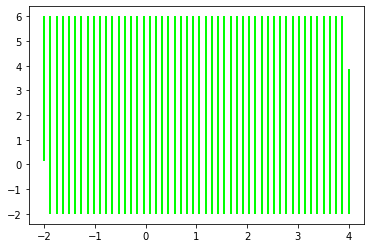

In [25]:
alpha=0.10 # for a 90% CI
xIntervals=[]
mymeasurements=np.linspace(-2.,4., num=50)
thetaspace=np.linspace(-2.,6., num=50)
#for theta in thetaspace:
#    xInterval=[]
#    qcond=qdist(theta,mymeasurements)
#    for xobsi in mymeasurements:
#        qobs=q(xobsi,theta)
#        if px(qcond,qobs) > alpha:
#            xInterval.append([xobsi,qobs])
#    #thetaIntervals.append((min(thetaInterval),max(thetaInterval)) if len(thetaInterval)>0 else (-5., 15.))
#    sorted_by_second = sorted(xInterval, key=lambda tup: tup[1])
#    xIntervals.append(np.array(sorted_by_second)[:,0])
#print(xIntervals)

thetaIntervals=[]
for xobsi in mymeasurements:
    thetaInterval=[]
    for theta in thetaspace:
        qcond=qdist(theta,mymeasurements)
        qobs=q(xobsi,theta)
        if px(qcond,qobs) > alpha:
            thetaInterval.append(theta)
    #thetaIntervals.append((min(thetaInterval),max(thetaInterval)) if len(thetaInterval)>0 else (-5., 15.))
    #sorted_by_second = sorted(xInterval, key=lambda tup: tup[1])
    thetaIntervals.append(thetaInterval)
print(thetaIntervals)


fc_intervals=[]
fc_colors=[]
for x, thetaI in zip(mymeasurements, thetaIntervals):
    fc_intervals.append([(x,thetaI[0]),(x,thetaI[-1])])
    fc_colors.append([0,1,0,1]) # blue?
from matplotlib import collections  as mc
import pylab as pl
fc_coll = mc.LineCollection(fc_intervals, colors=np.array(fc_colors), linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(fc_coll)
ax.autoscale()

No handles with labels found to put in legend.


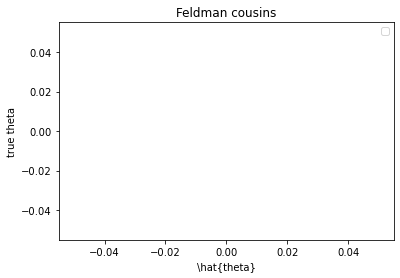

In [24]:
fc_intervals=[]
fc_colors=[]
for i, theta in zip(xIntervals, thetaspace):
    fc_intervals.append([(i[0],theta),(i[-1],theta)])
    fc_colors.append([0,1,0,1]) # blue?
from matplotlib import collections  as mc
import pylab as pl
fc_coll = mc.LineCollection(fc_intervals, colors=np.array(fc_colors), linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(fc_coll)
ax.autoscale()

# Plot this
#xobs=1.
#lower=[]
#upper=[]
#for i in mymeasurements:
#    lower.append(max(-2., ))
#for i, ttheta in zip(xIntervals, thetaspace):
#    mmin, mmax = findx(i,mymeasurements)
#    lower.append(mmin)
#    upper.append(mmax)
#plt.plot(mymeasurements,lower)
#plt.plot(mymeasurements,upper)
#plt.axvline(x=mle(xobs), c='red', label='MLE')
plt.title('Feldman cousins')
plt.xlabel('\hat{theta}')
plt.ylabel('true theta')
plt.legend(loc='best')

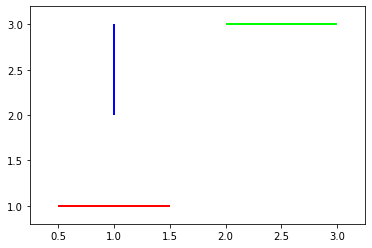

In [51]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0.5, 1), (1.5, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)